<a href="https://colab.research.google.com/github/jihun0423/electric_predict/blob/main/electric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [9]:
import os
os.chdir('./gdrive/MyDrive/electric')

## 전력 데이터 전처리

In [48]:
import pandas as pd
df = pd.read_csv('train.csv')

In [96]:
test = pd.read_csv('test.csv')

In [50]:
df.head(5)

num_date_time  건물번호           일시  기온(C)  강수량(mm)  풍속(m/s)  습도(%)  일조(hr)  \
0  1_20220601 00     1  20220601 00   18.6      NaN      0.9   42.0     NaN   
1  1_20220601 01     1  20220601 01   18.0      NaN      1.1   45.0     NaN   
2  1_20220601 02     1  20220601 02   17.7      NaN      1.5   45.0     NaN   
3  1_20220601 03     1  20220601 03   16.7      NaN      1.4   48.0     NaN   
4  1_20220601 04     1  20220601 04   18.4      NaN      2.8   43.0     NaN   

   일사(MJ/m2)  전력소비량(kWh)  
0        NaN     1085.28  
1        NaN     1047.36  
2        NaN      974.88  
3        NaN      953.76  
4        NaN      986.40

In [51]:
df['날짜']=df['일시'].str.split(' ').str[0]
df['hour']=df['일시'].str.split(' ').str[1].astype('int')

test['날짜']=test['일시'].str.split(' ').str[0]
test['hour']=test['일시'].str.split(' ').str[1].astype('int')

In [53]:
df['날짜'] = pd.to_datetime(df.날짜)
test['날짜'] = pd.to_datetime(test.날짜)

In [33]:
df.head(5)

num_date_time  건물번호           일시  기온(C)  강수량(mm)  풍속(m/s)  습도(%)  \
0  1_20220825 00     1  20220825 00   23.5      0.0      2.2     72   
1  1_20220825 01     1  20220825 01   23.0      0.0      0.9     72   
2  1_20220825 02     1  20220825 02   22.7      0.0      1.5     75   
3  1_20220825 03     1  20220825 03   22.1      0.0      1.3     78   
4  1_20220825 04     1  20220825 04   21.8      0.0      1.0     77   

          날짜  hour  
0 2022-08-25     0  
1 2022-08-25     1  
2 2022-08-25     2  
3 2022-08-25     3  
4 2022-08-25     4

In [54]:
import numpy as np
df['hour'] = np.sin(2*np.pi*df['hour']/24)
test['hour'] = np.sin(2*np.pi*test['hour']/24)

In [58]:
df['dow'] = df['날짜'].dt.weekday
df['month'] = df['날짜'].dt.month
df['day'] = df['날짜'].dt.day
df['holiday'] = df['dow'].apply(lambda x: 0 if x<5 else 1)

In [59]:
test['dow'] = test['날짜'].dt.weekday
test['month'] = test['날짜'].dt.month
test['day'] = test['날짜'].dt.day
test['holiday'] = test['dow'].apply(lambda x: 0 if x<5 else 1)

In [60]:
df

num_date_time  건물번호           일시  기온(C)  강수량(mm)  풍속(m/s)  습도(%)  \
0         1_20220601 00     1  20220601 00   18.6      NaN      0.9   42.0   
1         1_20220601 01     1  20220601 01   18.0      NaN      1.1   45.0   
2         1_20220601 02     1  20220601 02   17.7      NaN      1.5   45.0   
3         1_20220601 03     1  20220601 03   16.7      NaN      1.4   48.0   
4         1_20220601 04     1  20220601 04   18.4      NaN      2.8   43.0   
...                 ...   ...          ...    ...      ...      ...    ...   
203995  100_20220824 19   100  20220824 19   23.1      NaN      0.9   86.0   
203996  100_20220824 20   100  20220824 20   22.4      NaN      1.3   86.0   
203997  100_20220824 21   100  20220824 21   21.3      NaN      1.0   92.0   
203998  100_20220824 22   100  20220824 22   21.0      NaN      0.3   94.0   
203999  100_20220824 23   100  20220824 23   20.7      NaN      0.1   95.0   

        일조(hr)  일사(MJ/m2)  전력소비량(kWh)         날짜      hour  dow  month  day  \
0          NaN        NaN     1085.28 2022-06-01  0.000000    2      6    1   
1          NaN        NaN     1047.36 2022-06-01  0.258819    2      6    1   
2          NaN        NaN      974.88 2022-06-01  0.500000    2      6    1   
3          NaN        NaN      953.76 2022-06-01  0.707107    2      6    1   
4          NaN        NaN      986.40 2022-06-01  0.866025    2      6    1   
...        ...        ...         ...        ...       ...  ...    ...  ...   
203995     0.5        NaN      881.04 2022-08-24 -0.965926    2      8   24   
203996     0.0        NaN      798.96 2022-08-24 -0.866025    2      8   24   
203997     NaN        NaN      825.12 2022-08-24 -0.707107    2      8   24   
203998     NaN        NaN      640.08 2022-08-24 -0.500000    2      8   24   
203999     NaN        NaN      540.24 2022-08-24 -0.258819    2      8   24   

        holiday  
0             0  
1             0  
2             0  
3             0  
4             0  
...         ...  
203995        0  
203996        0  
203997        0  
203998        0  
203999        0  

[204000 rows x 16 columns]

In [61]:
from datetime import datetime
holiday = [datetime(2022, 6, 1), datetime(2022, 6, 6), datetime(2022, 8, 15)]
df['holiday']=((df['dow']>4) | (df['날짜'].isin(holiday))) *1

holiday = [datetime(2022, 6, 1), datetime(2022, 6, 6), datetime(2022, 8, 15)]
test['holiday']=((test['dow']>4) | (test['날짜'].isin(holiday))) *1

In [37]:
# from datetime import datetime
# holiday = [datetime(2022, 6, 1), datetime(2022, 6, 6), datetime(2022, 8, 15)]
# df['holiday'] = df.apply(lambda x: 1 if ((df['날짜'].isin(holiday)) | (df['dow'] > 4)) else 0, axis=1)

### 결측치 처리

In [62]:
df.isnull().sum()

num_date_time         0
건물번호                  0
일시                    0
기온(C)                 0
강수량(mm)          160069
풍속(m/s)              19
습도(%)                 9
일조(hr)            75182
일사(MJ/m2)         87913
전력소비량(kWh)            0
날짜                    0
hour                  0
dow                   0
month                 0
day                   0
holiday               0
dtype: int64

In [63]:
df['강수량(mm)']=df['강수량(mm)'].fillna(0)

In [64]:
df.groupby(['건물번호','month','hour'],as_index=False).mean()

건물번호  month      hour      기온(C)   강수량(mm)   풍속(m/s)      습도(%)  \
0        1      6 -1.000000  25.610000  0.723333  2.906667  65.633333   
1        1      6 -0.965926  24.886667  1.133333  3.083333  67.433333   
2        1      6 -0.965926  25.966667  0.493333  2.960000  64.700000   
3        1      6 -0.866025  23.923333  0.756667  3.026667  70.633333   
4        1      6 -0.866025  26.123333  0.326667  3.143333  64.700000   
...    ...    ...       ...        ...       ...       ...        ...   
6595   100      8  0.707107  26.425000  1.208333  1.341667  88.125000   
6596   100      8  0.866025  24.762500  0.979167  1.029167  95.833333   
6597   100      8  0.866025  25.570833  2.050000  1.170833  92.250000   
6598   100      8  0.965926  24.864583  1.177083  1.014583  95.750000   
6599   100      8  1.000000  24.658333  0.862500  0.829167  96.541667   

        일조(hr)  일사(MJ/m2)  전력소비량(kWh)       dow   day   holiday  
0     0.340000   0.651667    2595.296  2.966667  15.5  0.333333  
1     0.323333   0.307333    2419.520  2.966667  15.5  0.333333  
2     0.286667   0.928000    2838.504  2.966667  15.5  0.333333  
3     0.073333   0.061667    2230.592  2.966667  15.5  0.333333  
4     0.280000   1.131000    3422.256  2.966667  15.5  0.333333  
...        ...        ...         ...       ...   ...       ...  
6595  0.195833        NaN    1121.330  2.750000  12.5  0.291667  
6596       NaN        NaN     406.050  2.750000  12.5  0.291667  
6597  0.120833        NaN     980.010  2.750000  12.5  0.291667  
6598  0.029167        NaN     646.080  2.750000  12.5  0.291667  
6599  0.000000        NaN     644.380  2.750000  12.5  0.291667  

[6600 rows x 13 columns]

In [65]:
df_nummonthhour_mean = df.groupby(['건물번호','month','hour'],as_index=False).mean()

In [66]:
null_feature = ['풍속(m/s)','습도(%)','일조(hr)','일사(MJ/m2)']

In [67]:
for col in null_feature:
  for i in df[df[col].isnull()].index:
    num = df.loc[i,'건물번호']
    month = df.loc[i,'month']
    hour = df.loc[i,'hour']
    data_mean = df_nummonthhour_mean[(df_nummonthhour_mean['건물번호']==num)&(df_nummonthhour_mean['month']==month)&(df_nummonthhour_mean['hour']==hour)]
    df.loc[i,col] = data_mean[col].values

In [68]:
df['일조(hr)'] = df['일조(hr)'].fillna(0)

In [69]:
df['일사(MJ/m2)'] = df['일사(MJ/m2)'].fillna(0)

In [70]:
df.isnull().sum()

num_date_time    0
건물번호             0
일시               0
기온(C)            0
강수량(mm)          0
풍속(m/s)          0
습도(%)            0
일조(hr)           0
일사(MJ/m2)        0
전력소비량(kWh)       0
날짜               0
hour             0
dow              0
month            0
day              0
holiday          0
dtype: int64

### feature 생성

In [71]:
df['THI'] = 9/5*df['기온(C)'] - 0.55*(1-df['습도(%)']/100)*(9/5*df['습도(%)']-26)+32
df['THI'] = pd.cut(df['THI'], bins = [0, 68, 75, 80, 200], labels = [1,2,3,4])
df['THI'] = df['THI'].astype(int)

test['THI'] = 9/5*test['기온(C)'] - 0.55*(1-test['습도(%)']/100)*(9/5*test['습도(%)']-26)+32
test['THI'] = pd.cut(test['THI'], bins = [0, 68, 75, 80, 200], labels = [1,2,3,4])
test['THI'] = test['THI'].astype(int)

In [72]:
def CDH(xs):
    ys = []
    for i in range(len(xs)):
        if i < 11:
            ys.append(np.sum(xs[:(i+1)]-26))
        else:
            ys.append(np.sum(xs[(i-11):(i+1)]-26))
    return np.array(ys)

In [73]:
cdhs = np.array([])
for num in range(1,101,1):
    temp = df[df['건물번호'] == num]
    cdh = CDH(temp['기온(C)'].values)
    cdhs = np.concatenate([cdhs, cdh])
df['CDH'] = cdhs

In [74]:
cdhs = np.array([])
for num in range(1,101,1):
    temp = test[test['건물번호'] == num]
    cdh = CDH(temp['기온(C)'].values)
    cdhs = np.concatenate([cdhs, cdh])
test['CDH'] = cdhs

In [99]:
test['THI'] = 9/5*test['기온(C)'] - 0.55*(1-test['습도(%)']/100)*(9/5*test['습도(%)']-26)+32
test['THI'] = pd.cut(test['THI'], bins = [0, 68, 75, 80, 200], labels = [1,2,3,4])
test['THI'] = test['THI'].astype(int)

In [100]:
cdhs = np.array([])
for num in range(1,101,1):
    temp = test[test['건물번호'] == num]
    cdh = CDH(temp['기온(C)'].values)
    cdhs = np.concatenate([cdhs, cdh])
test['CDH'] = cdhs

In [101]:
test

num_date_time  건물번호           일시  기온(C)  강수량(mm)  풍속(m/s)  습도(%)  \
0        1_20220825 00     1  20220825 00   23.5      0.0      2.2     72   
1        1_20220825 01     1  20220825 01   23.0      0.0      0.9     72   
2        1_20220825 02     1  20220825 02   22.7      0.0      1.5     75   
3        1_20220825 03     1  20220825 03   22.1      0.0      1.3     78   
4        1_20220825 04     1  20220825 04   21.8      0.0      1.0     77   
...                ...   ...          ...    ...      ...      ...    ...   
16795  100_20220831 19   100  20220831 19   22.5      0.0      0.9     84   
16796  100_20220831 20   100  20220831 20   20.7      0.0      0.4     95   
16797  100_20220831 21   100  20220831 21   20.2      0.0      0.4     98   
16798  100_20220831 22   100  20220831 22   20.1      0.0      1.1     97   
16799  100_20220831 23   100  20220831 23   19.1      0.0      0.1     99   

           hour  dow  month  ...  kWh_ndh_std  kWh_nh_mean    kWh_nh_sd  건물유형  \
0      0.000000    3      8  ...   446.984913  2704.598333  1158.473940     0   
1      0.258819    3      8  ...   449.091398  2704.598333  1158.473940     0   
2      0.500000    3      8  ...  1316.247262  2704.598333  1158.473940     0   
3      0.707107    3      8  ...   378.117772  2704.598333  1158.473940     0   
4      0.866025    3      8  ...   360.348483  2704.598333  1158.473940     0   
...         ...  ...    ...  ...          ...          ...          ...   ...   
16795 -0.965926    2      8  ...   163.825489   789.907692   306.653068    11   
16796 -0.866025    2      8  ...   153.076049   789.907692   306.653068    11   
16797 -0.707107    2      8  ...   143.415686   789.907692   306.653068    11   
16798 -0.500000    2      8  ...   105.147190   789.907692   306.653068    11   
16799 -0.258819    2      8  ...   102.176203   789.907692   306.653068    11   

         연면적(m2)  냉방면적(m2)  태양광용량(kW)  ESS저장용량(kWh)  PCS용량(kW)  THI  
0      110634.00  39570.00        0.0           0.0        0.0    1  
1      110634.00  39570.00        0.0           0.0        0.0    1  
2      110634.00  39570.00        0.0           0.0        0.0    1  
3      110634.00  39570.00        0.0           0.0        0.0    1  
4      110634.00  39570.00        0.0           0.0        0.0    1  
...          ...       ...        ...           ...        ...  ...  
16795   57497.84  40035.23        0.0           0.0        0.0    1  
16796   57497.84  40035.23        0.0           0.0        0.0    1  
16797   57497.84  40035.23        0.0           0.0        0.0    1  
16798   57497.84  40035.23        0.0           0.0        0.0    1  
16799   57497.84  40035.23        0.0           0.0        0.0    1  

[16800 rows x 24 columns]

In [153]:
df

num_date_time  건물번호           일시  기온(C)  강수량(mm)  풍속(m/s)  습도(%)  \
0         1_20220601 00     1  20220601 00   18.6      0.0      0.9   42.0   
1         1_20220601 01     1  20220601 01   18.0      0.0      1.1   45.0   
2         1_20220601 02     1  20220601 02   17.7      0.0      1.5   45.0   
3         1_20220601 03     1  20220601 03   16.7      0.0      1.4   48.0   
4         1_20220601 04     1  20220601 04   18.4      0.0      2.8   43.0   
...                 ...   ...          ...    ...      ...      ...    ...   
203995  100_20220824 19   100  20220824 19   23.1      0.0      0.9   86.0   
203996  100_20220824 20   100  20220824 20   22.4      0.0      1.3   86.0   
203997  100_20220824 21   100  20220824 21   21.3      0.0      1.0   92.0   
203998  100_20220824 22   100  20220824 22   21.0      0.0      0.3   94.0   
203999  100_20220824 23   100  20220824 23   20.7      0.0      0.1   95.0   

        일조(hr)  일사(MJ/m2)  전력소비량(kWh)         날짜      hour  dow  month  day  \
0         0.00   0.000000     1085.28 2022-06-01  0.000000    2      6    1   
1         0.00   0.000000     1047.36 2022-06-01  0.258819    2      6    1   
2         0.42   1.396667      974.88 2022-06-01  0.500000    2      6    1   
3         0.00   0.000000      953.76 2022-06-01  0.707107    2      6    1   
4         0.00   0.000000      986.40 2022-06-01  0.866025    2      6    1   
...        ...        ...         ...        ...       ...  ...    ...  ...   
203995    0.50   0.000000      881.04 2022-08-24 -0.965926    2      8   24   
203996    0.00   0.000000      798.96 2022-08-24 -0.866025    2      8   24   
203997    0.00   0.000000      825.12 2022-08-24 -0.707107    2      8   24   
203998    0.00   0.000000      640.08 2022-08-24 -0.500000    2      8   24   
203999    0.00   0.000000      540.24 2022-08-24 -0.258819    2      8   24   

        holiday  THI   CDH  
0             1    1  -7.4  
1             1    1 -15.4  
2             1    1 -23.7  
3             1    1 -33.0  
4             1    1 -40.6  
...         ...  ...   ...  
203995        0    1 -19.6  
203996        0    1 -20.2  
203997        0    1 -22.3  
203998        0    1 -25.1  
203999        0    1 -28.1  

[204000 rows x 18 columns]

In [155]:
df_numdowhour_mean = df.groupby(['건물번호','dow','hour'],as_index=False).mean()

<ipython-input-155-f60f7948a67e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_numdowhour_mean = df.groupby(['건물번호','dow','hour'],as_index=False).mean()


In [156]:
df.groupby(['건물번호','dow','hour'],as_index=False).mean()[['건물번호','dow','hour','전력소비량(kWh)']]

<ipython-input-156-3d2d759e2eeb>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['건물번호','dow','hour'],as_index=False).mean()[['건물번호','dow','hour','전력소비량(kWh)']]


건물번호 dow      hour  전력소비량(kWh)
0         1   0 -1.000000     2855.94
1         1   0 -0.965926     2658.10
2         1   0 -0.965926     3507.32
3         1   0 -0.866025     2409.60
4         1   0 -0.866025     4018.90
...     ...  ..       ...         ...
15395   100   6  0.707107     1067.24
15396   100   6  0.866025      377.84
15397   100   6  0.866025      936.68
15398   100   6  0.965926      606.76
15399   100   6  1.000000      621.76

[15400 rows x 4 columns]

In [157]:
df_numdowhour_mean.columns.values[3] = 'kWh_ndh_mean'

In [158]:
df_numdowhour_mean

건물번호 dow      hour  kWh_ndh_mean   강수량(mm)   풍속(m/s)      습도(%)  \
0         1   0 -1.000000     28.025000  2.308333  3.333333  70.333333   
1         1   0 -0.965926     27.508333  1.100000  3.275000  72.333333   
2         1   0 -0.965926     28.316667  0.658333  3.441667  69.833333   
3         1   0 -0.866025     26.841667  0.008333  3.075000  74.083333   
4         1   0 -0.866025     28.508333  0.883333  2.950000  70.333333   
...     ...  ..       ...           ...       ...       ...        ...   
15395   100   6  0.707107     25.275000  0.025000  1.391667  83.750000   
15396   100   6  0.866025     23.008333  0.275000  0.533333  93.750000   
15397   100   6  0.866025     24.258333  0.158333  0.941667  88.666667   
15398   100   6  0.965926     23.058333  0.333333  0.537500  93.291667   
15399   100   6  1.000000     22.616667  0.025000  0.383333  95.833333   

         일조(hr)  일사(MJ/m2)  전력소비량(kWh)     month        day   holiday  \
0      0.350000   0.647500     2855.94  7.000000  14.166667  0.166667   
1      0.308333   0.319167     2658.10  7.000000  14.166667  0.166667   
2      0.333333   0.994167     3507.32  7.000000  14.166667  0.166667   
3      0.075000   0.059167     2409.60  7.000000  14.166667  0.166667   
4      0.291667   1.151667     4018.90  7.000000  14.166667  0.166667   
...         ...        ...         ...       ...        ...       ...   
15395  0.250000   0.000000     1067.24  6.916667  15.750000  1.000000   
15396  0.000000   0.000000      377.84  6.916667  15.750000  1.000000   
15397  0.158333   0.000000      936.68  6.916667  15.750000  1.000000   
15398  0.102237   0.000000      606.76  6.916667  15.750000  1.000000   
15399  0.000000   0.000000      621.76  6.916667  15.750000  1.000000   

            THI        CDH  
0      1.583333  15.558333  
1      1.666667  18.800000  
2      1.666667  11.666667  
3      1.583333  20.841667  
4      1.666667   7.566667  
...         ...        ...  
15395  1.666667 -28.083333  
15396  1.916667  -9.725000  
15397  1.666667 -28.308333  
15398  1.791667 -21.333333  
15399  1.833333 -22.491667  

[15400 rows x 15 columns]

In [75]:
df_numdowhour_mean = df.groupby(['건물번호','dow','hour'],as_index=False).mean()[['건물번호','dow','hour','전력소비량(kWh)']]
df_numdowhour_mean.columns.values[3] = 'kWh_ndh_mean'
df_numdowhour_sd = df.groupby(['건물번호','dow','hour'],as_index=False).std()[['건물번호','dow','hour','전력소비량(kWh)']]
df_numdowhour_sd.columns.values[3] = 'kWh_ndh_std'
df_numdow_mean = df.groupby(['건물번호','dow'],as_index=False).mean()[['건물번호','dow','전력소비량(kWh)']]
df_numdow_mean.columns.values[2] = 'kWh_nh_mean'
df_numdow_sd = df.groupby(['건물번호','dow'],as_index=False).std()[['건물번호','dow','전력소비량(kWh)']]
df_numdow_sd.columns.values[2] = 'kWh_nh_sd'

In [76]:
df=df.merge(df_numdowhour_mean,on=['건물번호','dow','hour'],how='left')
df=df.merge(df_numdowhour_sd,on=['건물번호','dow','hour'],how='left')
df=df.merge(df_numdow_mean,on=['건물번호','dow'],how='left')
df=df.merge(df_numdow_sd,on=['건물번호','dow'],how='left')

In [77]:
test=test.merge(df_numdowhour_mean,on=['건물번호','dow','hour'],how='left')
test=test.merge(df_numdowhour_sd,on=['건물번호','dow','hour'],how='left')
test=test.merge(df_numdow_mean,on=['건물번호','dow'],how='left')
test=test.merge(df_numdow_sd,on=['건물번호','dow'],how='left')

In [161]:
df.head()

num_date_time  건물번호           일시  기온(C)  강수량(mm)  풍속(m/s)  습도(%)  일조(hr)  \
0  1_20220601 00     1  20220601 00   18.6      0.0      0.9   42.0    0.00   
1  1_20220601 01     1  20220601 01   18.0      0.0      1.1   45.0    0.00   
2  1_20220601 02     1  20220601 02   17.7      0.0      1.5   45.0    0.42   
3  1_20220601 03     1  20220601 03   16.7      0.0      1.4   48.0    0.00   
4  1_20220601 04     1  20220601 04   18.4      0.0      2.8   43.0    0.00   

   일사(MJ/m2)  전력소비량(kWh)  ... dow  month day  holiday  THI   CDH  \
0   0.000000     1085.28  ...   2      6   1        1    1  -7.4   
1   0.000000     1047.36  ...   2      6   1        1    1 -15.4   
2   1.396667      974.88  ...   2      6   1        1    1 -23.7   
3   0.000000      953.76  ...   2      6   1        1    1 -33.0   
4   0.000000      986.40  ...   2      6   1        1    1 -40.6   

   kWh_ndh_mean  kWh_ndh_std  kWh_nh_mean    kWh_nh_sd  
0   1774.744615   517.982222  2682.796923  1136.240307  
1   1687.347692   500.769931  2682.796923  1136.240307  
2   2721.175385  1279.562737  2682.796923  1136.240307  
3   1522.153846   436.601091  2682.796923  1136.240307  
4   1506.793846   405.518091  2682.796923  1136.240307  

[5 rows x 22 columns]

## 건물 정보 전처리

In [78]:
df_b = pd.read_csv('building_info.csv')

In [79]:
df_b.head(5)

건물번호  건물유형    연면적(m2)   냉방면적(m2) 태양광용량(kW) ESS저장용량(kWh) PCS용량(kW)
0     1  건물기타  110634.00   39570.00         -            -         -
1     2  건물기타  122233.47   99000.00         -            -         -
2     3  건물기타  171243.00  113950.00        40            -         -
3     4  건물기타   74312.98   34419.62        60            -         -
4     5  건물기타  205884.00  150000.00         -         2557      1000

In [80]:
df_b.isnull().sum()

건물번호            0
건물유형            0
연면적(m2)         0
냉방면적(m2)        0
태양광용량(kW)       0
ESS저장용량(kWh)    0
PCS용량(kW)       0
dtype: int64

In [81]:
df_b=df_b.replace('-',0)

In [166]:
df_b.groupby('건물유형',as_index=False).mean()

<ipython-input-166-127e8baf7384>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_b.groupby('건물유형',as_index=False).mean()


건물유형  건물번호       연면적(m2)      냉방면적(m2)
0      건물기타   8.0  1.084411e+05  5.417702e+04
1        공공  19.5  1.687602e+06  1.411875e+06
2       대학교  27.5  3.699181e+05  2.478968e+05
3     데이터센터  34.0  1.851530e+04  1.187450e+04
4   백화점및아울렛  40.5  1.036846e+05  5.771201e+04
5        병원  48.5  1.019759e+05  8.230490e+04
6        상용  56.5  9.267848e+04  6.076371e+04
7       아파트  64.5  2.615197e+05  1.418271e+05
8       연구소  72.5  1.118182e+05  7.612745e+04
9    지식산업센터  80.5  1.735248e+05  7.056204e+04
10     할인마트  88.5  6.759438e+04  3.088940e+04
11   호텔및리조트  96.5  7.587848e+04  4.107894e+04

In [82]:
conv_dict = dict(zip(list(df_b['건물유형'].unique()), [0,1,2,3,4,5,6,7,8,9,10,11]))
conv_dict

{'건물기타': 0,
 '공공': 1,
 '대학교': 2,
 '데이터센터': 3,
 '백화점및아울렛': 4,
 '병원': 5,
 '상용': 6,
 '아파트': 7,
 '연구소': 8,
 '지식산업센터': 9,
 '할인마트': 10,
 '호텔및리조트': 11}

In [83]:
df_b['건물유형'] = df_b['건물유형'].map(conv_dict)

In [169]:
df = df.merge(df_b,on = '건물번호',how='left')

In [84]:
test = test.merge(df_b,on = '건물번호',how='left')

In [170]:
df.head(5)

num_date_time  건물번호           일시  기온(C)  강수량(mm)  풍속(m/s)  습도(%)  일조(hr)  \
0  1_20220601 00     1  20220601 00   18.6      0.0      0.9   42.0    0.00   
1  1_20220601 01     1  20220601 01   18.0      0.0      1.1   45.0    0.00   
2  1_20220601 02     1  20220601 02   17.7      0.0      1.5   45.0    0.42   
3  1_20220601 03     1  20220601 03   16.7      0.0      1.4   48.0    0.00   
4  1_20220601 04     1  20220601 04   18.4      0.0      2.8   43.0    0.00   

   일사(MJ/m2)  전력소비량(kWh)  ... kWh_ndh_mean  kWh_ndh_std  kWh_nh_mean  \
0   0.000000     1085.28  ...  1774.744615   517.982222  2682.796923   
1   0.000000     1047.36  ...  1687.347692   500.769931  2682.796923   
2   1.396667      974.88  ...  2721.175385  1279.562737  2682.796923   
3   0.000000      953.76  ...  1522.153846   436.601091  2682.796923   
4   0.000000      986.40  ...  1506.793846   405.518091  2682.796923   

     kWh_nh_sd  건물유형   연면적(m2)  냉방면적(m2)  태양광용량(kW)  ESS저장용량(kWh)  PCS용량(kW)  
0  1136.240307     0  110634.0   39570.0          0             0          0  
1  1136.240307     0  110634.0   39570.0          0             0          0  
2  1136.240307     0  110634.0   39570.0          0             0          0  
3  1136.240307     0  110634.0   39570.0          0             0          0  
4  1136.240307     0  110634.0   39570.0          0             0          0  

[5 rows x 28 columns]

In [85]:
test.head(5)

num_date_time  건물번호           일시  기온(C)  강수량(mm)  풍속(m/s)  습도(%)  \
0  1_20220825 00     1  20220825 00   23.5      0.0      2.2     72   
1  1_20220825 01     1  20220825 01   23.0      0.0      0.9     72   
2  1_20220825 02     1  20220825 02   22.7      0.0      1.5     75   
3  1_20220825 03     1  20220825 03   22.1      0.0      1.3     78   
4  1_20220825 04     1  20220825 04   21.8      0.0      1.0     77   

          날짜      hour  dow  month  day  holiday   CDH  kWh_ndh_mean  \
0 2022-08-25  0.000000    3      8   25        0  -2.5       1627.80   
1 2022-08-25  0.258819    3      8   25        0  -5.5       1550.08   
2 2022-08-25  0.500000    3      8   25        0  -8.8       2644.94   
3 2022-08-25  0.707107    3      8   25        0 -12.7       1372.20   
4 2022-08-25  0.866025    3      8   25        0 -16.9       1381.72   

   kWh_ndh_std  kWh_nh_mean   kWh_nh_sd  건물유형   연면적(m2)  냉방면적(m2) 태양광용량(kW)  \
0   446.984913  2704.598333  1158.47394     0  110634.0   39570.0         0   
1   449.091398  2704.598333  1158.47394     0  110634.0   39570.0         0   
2  1316.247262  2704.598333  1158.47394     0  110634.0   39570.0         0   
3   378.117772  2704.598333  1158.47394     0  110634.0   39570.0         0   
4   360.348483  2704.598333  1158.47394     0  110634.0   39570.0         0   

  ESS저장용량(kWh) PCS용량(kW)  
0            0         0  
1            0         0  
2            0         0  
3            0         0  
4            0         0

In [191]:
df['dow'] = df['dow'].astype('int32')
df['태양광용량(kW)'] = df['태양광용량(kW)'].astype('float')
df['ESS저장용량(kWh)'] = df['ESS저장용량(kWh)'].astype('float')
df['PCS용량(kW)'] = df['PCS용량(kW)'].astype('float')

In [86]:
test['dow'] = test['dow'].astype('int32')
test['태양광용량(kW)'] = test['태양광용량(kW)'].astype('float')
test['ESS저장용량(kWh)'] = test['ESS저장용량(kWh)'].astype('float')
test['PCS용량(kW)'] = test['PCS용량(kW)'].astype('float')

In [185]:
df=df.drop(columns=['날짜'])

In [87]:
test=test.drop(columns=['날짜'])

In [192]:
df.to_pickle('electric.pickle')

In [88]:
test.to_pickle('test.pickle')

In [187]:
df.columns

Index(['num_date_time', '건물번호', '일시', '기온(C)', '강수량(mm)', '풍속(m/s)', '습도(%)',
       '일조(hr)', '일사(MJ/m2)', '전력소비량(kWh)', 'hour', 'dow', 'month', 'day',
       'holiday', 'THI', 'CDH', 'kWh_ndh_mean', 'kWh_ndh_std', 'kWh_nh_mean',
       'kWh_nh_sd', '건물유형', '연면적(m2)', '냉방면적(m2)', '태양광용량(kW)', 'ESS저장용량(kWh)',
       'PCS용량(kW)'],
      dtype='object')

In [176]:
!pip install sktime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 53.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.7/118.7 kB 10.9 MB/s eta 0:00:00


In [189]:
x

기온(C)  강수량(mm)  풍속(m/s)  습도(%)    일조(hr)  일사(MJ/m2)      hour dow  \
12240   17.9      0.0      1.0   48.0  0.000000   0.000000  0.000000   2   
12241   17.7      0.0      1.2   50.0  0.000000   0.000000  0.258819   2   
12242   17.5      0.0      1.7   49.0  0.473333   1.425667  0.500000   2   
12243   15.9      0.0      0.4   54.0  0.000000   0.000000  0.707107   2   
12244   16.6      0.0      2.6   53.0  0.000000   0.000000  0.866025   2   
...      ...      ...      ...    ...       ...        ...       ...  ..   
14275   25.9      0.0      2.3   63.0  0.000000   0.040000 -0.965926   2   
14276   24.8      0.0      2.7   66.0  0.000000   0.000000 -0.866025   2   
14277   23.9      0.0      1.9   70.0  0.000000   0.000000 -0.707107   2   
14278   23.6      0.0      0.7   71.0  0.000000   0.000000 -0.500000   2   
14279   22.9      0.0      0.7   74.0  0.000000   0.000000 -0.258819   2   

       month  day  ...  kWh_ndh_mean  kWh_ndh_std  kWh_nh_mean   kWh_nh_sd  \
12240      6    1  ...    440.640000   127.591473   811.897692  282.419976   
12241      6    1  ...    442.744615   122.878092   811.897692  282.419976   
12242      6    1  ...    771.655385   364.521963   811.897692  282.419976   
12243      6    1  ...    426.793846   120.198970   811.897692  282.419976   
12244      6    1  ...    428.252308   116.872917   811.897692  282.419976   
...      ...  ...  ...           ...          ...          ...         ...   
14275      8   24  ...    954.443077    95.363683   811.897692  282.419976   
14276      8   24  ...    931.716923   104.597783   811.897692  282.419976   
14277      8   24  ...    686.547692   162.600149   811.897692  282.419976   
14278      8   24  ...    539.353846   149.630405   811.897692  282.419976   
14279      8   24  ...    457.606154   130.622720   811.897692  282.419976   

       건물유형    연면적(m2)  냉방면적(m2)  태양광용량(kW)  ESS저장용량(kWh)  PCS용량(kW)  
12240     0  101711.52   41341.1          0           800        300  
12241     0  101711.52   41341.1          0           800        300  
12242     0  101711.52   41341.1          0           800        300  
12243     0  101711.52   41341.1          0           800        300  
12244     0  101711.52   41341.1          0           800        300  
...     ...        ...       ...        ...           ...        ...  
14275     0  101711.52   41341.1          0           800        300  
14276     0  101711.52   41341.1          0           800        300  
14277     0  101711.52   41341.1          0           800        300  
14278     0  101711.52   41341.1          0           800        300  
14279     0  101711.52   41341.1          0           800        300  

[2040 rows x 23 columns]

train data shape
x:(1872, 23), y:(1872,)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


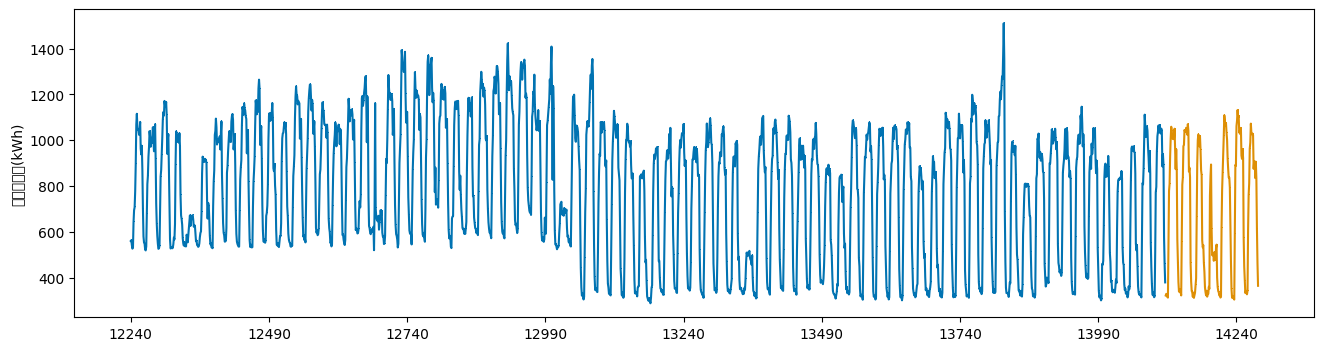

In [197]:
## 7번 건물의 발전량

from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting import plot_series
import matplotlib.pyplot as plt
import seaborn as sns


y = df.loc[df.건물번호 == 7, '전력소비량(kWh)']
x = df.loc[df.건물번호 == 7, ].iloc[:, 3:].drop(columns=['전력소비량(kWh)'])

y_train, y_valid, x_train, x_valid = temporal_train_test_split(y = y, X = x, test_size = 168) # 24시간*7일 = 168

print('train data shape\nx:{}, y:{}'.format(x_train.shape, y_train.shape))

plot_series(y_train, y_valid, markers=[',' , ','])
plt.show()

In [179]:
!pip install xgboost

In [1]:
from xgboost import XGBRegressor

In [198]:
xgb = XGBRegressor()
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_valid)

In [2]:
def SMAPE(true, pred):
    return np.mean((np.abs(true-pred))/(np.abs(true) + np.abs(pred))) * 100

In [200]:
SMAPE(y_valid,y_pred)

4.476917445001494

# --------------------------

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.chdir('./gdrive/MyDrive/electric')

In [89]:
import pandas as pd
import numpy as np
df=pd.read_pickle('electric.pickle')
test=pd.read_pickle('test.pickle')

In [5]:
!pip install --pre pycaret

  Using cached pycaret-3.1.0-py3-none-any.whl (483 kB)
  Using cached scipy-1.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.4 MB)
  Using cached pyod-1.1.0.tar.gz (153 kB)
  Preparing metadata (setup.py) ... done
  Using cached category_encoders-2.6.2-py2.py3-none-any.whl (81 kB)
  Using cached deprecation-2.1.0-py2.py3-none-any.whl (11 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.8 MB/s eta 0:

In [6]:
from pycaret.time_series import *

In [ ]:
y = df.loc[df.건물번호 == i, '전력소비량(kWh)']
x = df.loc[df.건물번호 == i, ].iloc[:, 3:].drop(columns=['전력소비량(kWh)'])
y_train, y_valid, x_train, x_valid = temporal_train_test_split(y = y, X = x, test_size = 168)

In [15]:
train = df.iloc[:200000,:]
test = df.iloc[200000:,:]

In [11]:
setup(data = df.iloc[:, 3:], target = '전력소비량(kWh)',  fh = 20000, fold=5, session_id = 123,use_gpu=True )

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Th

In [12]:
from pycaret.time_series import TSForecastingExperiment
s = TSForecastingExperiment()

In [36]:
add_metric('smape', 'SMAPE', SMAPE, greater_is_better=False)

ValueError: ignored

In [37]:
get_metrics()

Name Display Name                                    Score Function  \
ID                                                                            
mase    MASE         MASE                 <function mase at 0x7c8739e81510>   
rmsse  RMSSE        RMSSE                <function rmsse at 0x7c8739e83910>   
mae      MAE          MAE  <function mean_absolute_error at 0x7c8761632c20>   
rmse    RMSE         RMSE   <function mean_squared_error at 0x7c8761632dd0>   
mape    MAPE         MAPE                 <function mape at 0x7c8739e80e50>   
smape  SMAPE        SMAPE          <function _smape_loss at 0x7c8739e80c10>   
r2        R2           R2             <function r2_score at 0x7c87616330a0>   

                                                  Scorer Target  \
ID                                                                
mase          make_scorer(mase, greater_is_better=False)   pred   
rmsse        make_scorer(rmsse, greater_is_better=False)   pred   
mae                              neg_mean_absolute_error   pred   
rmse                         neg_root_mean_squared_error   pred   
mape          make_scorer(mape, greater_is_better=False)   pred   
smape  make_scorer(_smape_loss, greater_is_better=False)   pred   
r2                                                    r2   pred   

                     Args  Greater is Better  Custom  
ID                                                    
mase                   {}              False   False  
rmsse                  {}              False   False  
mae                    {}              False   False  
rmse   {'squared': False}              False   False  
mape                   {}              False   False  
smape                  {}              False   False  
r2                     {}               True   False

In [14]:
best = compare_models(sort = 'SMAPE')

Initiated  . . . . . . . . . . . . . . . . . .         16:11:34
Status     . . . . . . . . . . . . . . . . . .  Fitting 5 Folds
Estimator  . . . . . . . . . . . . . . . . . .            ARIMA

Processing:   0%|          | 0/101 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [15]:
from pycaret.regression import *

In [19]:
Setup_ = setup(data = df, target = '전력소비량(kWh)', fold_strategy = 'timeseries', fold = 3,data_split_shuffle = False, fold_shuffle = False, transform_target = True, session_id = 123),#use_gpu=True)

In [21]:
def SMAPE(true, pred):
    return np.mean((np.abs(true-pred))/(np.abs(true) + np.abs(pred))) * 100

add_metric('smape', 'SMAPE', SMAPE, greater_is_better=False)

Name                                                       SMAPE
Display Name                                               SMAPE
Score Function                <function SMAPE at 0x7fe9dfd1bac0>
Scorer               make_scorer(SMAPE, greater_is_better=False)
Target                                                      pred
Args                                                          {}
Greater is Better                                          False
Custom                                                      True
Name: smape, dtype: object

In [22]:
get_metrics()

Name Display Name                                     Score Function  \
ID                                                                             
mae      MAE          MAE   <function mean_absolute_error at 0x7fea0c9a5630>   
mse      MSE          MSE    <function mean_squared_error at 0x7fea0c9a57e0>   
rmse    RMSE         RMSE    <function mean_squared_error at 0x7fea0c9a57e0>   
r2        R2           R2              <function r2_score at 0x7fea0c9a5ab0>   
rmsle  RMSLE        RMSLE  <function RMSLEMetricContainer.__init__.<local...   
mape    MAPE         MAPE  <function MAPEMetricContainer.__init__.<locals...   
smape  SMAPE        SMAPE                 <function SMAPE at 0x7fe9dfd1bac0>   

                                                  Scorer Target  \
ID                                                                
mae                              neg_mean_absolute_error   pred   
mse                               neg_mean_squared_error   pred   
rmse                         neg_root_mean_squared_error   pred   
r2                                                    r2   pred   
rmsle  make_scorer(root_mean_squared_log_error, great...   pred   
mape   make_scorer(mean_absolute_percentage_error, gr...   pred   
smape        make_scorer(SMAPE, greater_is_better=False)   pred   

                     Args  Greater is Better  Custom  
ID                                                    
mae                    {}              False   False  
mse                    {}              False   False  
rmse   {'squared': False}              False   False  
r2                     {}               True   False  
rmsle                  {}              False   False  
mape                   {}              False   False  
smape                  {}              False    True

In [ ]:
# from pycaret.regression import *
# for code in tqdm(stock_list['종목코드'].values):
#     data = fdr.DataReader(code, start = start_date, end = end_date)[['Close']].reset_index()
#     data = pd.merge(Business_days, data, how = 'outer')
#     data['weekday'] = data.Date.apply(lambda x : x.weekday())
#     data['weeknum'] = data.Date.apply(lambda x : x.strftime('%V'))
#     data.Close = data.Close.ffill()

#     x = data.iloc[:-5]
#     y = data.iloc[-5:]
#     yy = y.drop('Close',axis=1)

#     reg = setup(data = x, target = 'Close', fold_strategy = 'timeseries', silent = True, fold = 5, session_id = 123 )
#     best = compare_models(sort= 'MAE',n_select=3)
#     blended_l = blend_models(estimator_list= best, fold = 3, optimize='MAE')
#     pred_holdout = predict_model(blended_l)
#     final_model_l = finalize_model(blended_l)
#     pred_esb_l = predict_model(final_model_l, yy)

#     pred_esb_l=pred_esb_l.reset_index()
#     sample_submission.loc[0,code] = pred_esb_l.at[0,'Label']
#     sample_submission.loc[1,code] = pred_esb_l.at[1,'Label']
#     sample_submission.loc[2,code] = pred_esb_l.at[2,'Label']
#     sample_submission.loc[3,code] = pred_esb_l.at[3,'Label']
#     sample_submission.loc[4,code] = pred_esb_l.at[4,'Label']  # sample submission의 위치에 맞게 Label값을 저장

In [102]:
df=df.drop(columns = ['일조(hr)','일사(MJ/m2)'])

In [103]:
df.head(3)

num_date_time  건물번호           일시  기온(C)  강수량(mm)  풍속(m/s)  습도(%)  \
0  1_20220601 00     1  20220601 00   18.6      0.0      0.9   42.0   
1  1_20220601 01     1  20220601 01   18.0      0.0      1.1   45.0   
2  1_20220601 02     1  20220601 02   17.7      0.0      1.5   45.0   

   전력소비량(kWh)      hour  dow  ...  kWh_ndh_mean  kWh_ndh_std  kWh_nh_mean  \
0     1085.28  0.000000    2  ...   1774.744615   517.982222  2682.796923   
1     1047.36  0.258819    2  ...   1687.347692   500.769931  2682.796923   
2      974.88  0.500000    2  ...   2721.175385  1279.562737  2682.796923   

     kWh_nh_sd  건물유형   연면적(m2)  냉방면적(m2)  태양광용량(kW)  ESS저장용량(kWh)  PCS용량(kW)  
0  1136.240307     0  110634.0   39570.0        0.0           0.0        0.0  
1  1136.240307     0  110634.0   39570.0        0.0           0.0        0.0  
2  1136.240307     0  110634.0   39570.0        0.0           0.0        0.0  

[3 rows x 25 columns]

In [104]:
test.head(3)

num_date_time  건물번호           일시  기온(C)  강수량(mm)  풍속(m/s)  습도(%)      hour  \
0  1_20220825 00     1  20220825 00   23.5      0.0      2.2     72  0.000000   
1  1_20220825 01     1  20220825 01   23.0      0.0      0.9     72  0.258819   
2  1_20220825 02     1  20220825 02   22.7      0.0      1.5     75  0.500000   

   dow  month  ...  kWh_ndh_std  kWh_nh_mean   kWh_nh_sd  건물유형   연면적(m2)  \
0    3      8  ...   446.984913  2704.598333  1158.47394     0  110634.0   
1    3      8  ...   449.091398  2704.598333  1158.47394     0  110634.0   
2    3      8  ...  1316.247262  2704.598333  1158.47394     0  110634.0   

   냉방면적(m2)  태양광용량(kW)  ESS저장용량(kWh)  PCS용량(kW)  THI  
0   39570.0        0.0           0.0        0.0    1  
1   39570.0        0.0           0.0        0.0    1  
2   39570.0        0.0           0.0        0.0    1  

[3 rows x 24 columns]

In [107]:
from tqdm import tqdm
from sktime.forecasting.model_selection import temporal_train_test_split
from pycaret.regression import *

y_pred = []

for i in tqdm(np.arange(1, 61)):

  y = df.loc[df.건물번호 == i, '전력소비량(kWh)']
  x = df.loc[df.건물번호 == i, ].iloc[:, 3:].drop(columns=['전력소비량(kWh)'])
  y_train, y_valid, x_train, x_valid = temporal_train_test_split(y = y, X = x, test_size = 168) # 24시간*7일 = 168

  df_train = df.loc[df.건물번호 == i]
  reg = setup(data = df_train.iloc[:,3:], target = '전력소비량(kWh)', fold_strategy = 'timeseries', fold = 3,data_split_shuffle = False, fold_shuffle = False, transform_target = True, session_id = 123)
  add_metric('smape', 'SMAPE', SMAPE, greater_is_better=False)

  best = compare_models(sort= 'SMAPE',n_select=3)
  blender_top3 = blend_models(estimator_list = best)

  final_model = finalize_model(blender_top3)
  prediction = predict_model(final_model, data=test[test.건물번호 == i])
  y_pred.append(prediction['prediction_label'])


  0%|          | 0/60 [00:00<?, ?it/s]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

  2%|▏         | 1/60 [00:51<50:10, 51.02s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

  3%|▎         | 2/60 [01:20<37:15, 38.55s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

  5%|▌         | 3/60 [01:40<28:13, 29.71s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

  7%|▋         | 4/60 [02:10<28:05, 30.09s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

  8%|▊         | 5/60 [02:29<23:56, 26.12s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

 10%|█         | 6/60 [02:52<22:23, 24.87s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

 12%|█▏        | 7/60 [03:16<21:53, 24.79s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

 13%|█▎        | 8/60 [03:39<20:58, 24.20s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

 15%|█▌        | 9/60 [04:06<21:12, 24.95s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

 17%|█▋        | 10/60 [04:26<19:28, 23.37s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

 18%|█▊        | 11/60 [04:54<20:13, 24.77s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

 20%|██        | 12/60 [05:13<18:28, 23.10s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

 22%|██▏       | 13/60 [05:40<19:05, 24.37s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

 23%|██▎       | 14/60 [06:00<17:33, 22.91s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

 25%|██▌       | 15/60 [06:20<16:31, 22.03s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

 27%|██▋       | 16/60 [06:49<17:40, 24.09s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

 28%|██▊       | 17/60 [07:14<17:27, 24.35s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

 30%|███       | 18/60 [07:44<18:23, 26.28s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

 32%|███▏      | 19/60 [08:12<18:19, 26.81s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

 33%|███▎      | 20/60 [08:44<18:54, 28.37s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

 35%|███▌      | 21/60 [09:14<18:36, 28.62s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

 37%|███▋      | 22/60 [09:39<17:36, 27.79s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

 38%|███▊      | 23/60 [10:04<16:31, 26.79s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

 40%|████      | 24/60 [10:28<15:36, 26.02s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

 42%|████▏     | 25/60 [10:53<14:58, 25.68s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

 43%|████▎     | 26/60 [11:17<14:13, 25.11s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

 45%|████▌     | 27/60 [11:43<14:01, 25.51s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

 47%|████▋     | 28/60 [12:09<13:40, 25.65s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

 48%|████▊     | 29/60 [12:40<14:00, 27.13s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

 50%|█████     | 30/60 [13:05<13:14, 26.48s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

 52%|█████▏    | 31/60 [13:34<13:07, 27.17s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

 53%|█████▎    | 32/60 [13:58<12:14, 26.23s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

 55%|█████▌    | 33/60 [14:19<11:10, 24.85s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

 57%|█████▋    | 34/60 [14:45<10:51, 25.05s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

 58%|█████▊    | 35/60 [15:09<10:18, 24.74s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

 60%|██████    | 36/60 [15:31<09:37, 24.06s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

 62%|██████▏   | 37/60 [16:04<10:12, 26.65s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

 63%|██████▎   | 38/60 [16:32<09:56, 27.13s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

 65%|██████▌   | 39/60 [17:05<10:07, 28.92s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

 67%|██████▋   | 40/60 [17:37<09:56, 29.84s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

 68%|██████▊   | 41/60 [18:07<09:25, 29.74s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

 70%|███████   | 42/60 [18:35<08:48, 29.38s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

 72%|███████▏  | 43/60 [19:10<08:44, 30.83s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

 73%|███████▎  | 44/60 [19:44<08:28, 31.80s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

 75%|███████▌  | 45/60 [20:09<07:30, 30.01s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

 77%|███████▋  | 46/60 [20:41<07:08, 30.58s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

 78%|███████▊  | 47/60 [21:13<06:42, 30.97s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

 80%|████████  | 48/60 [21:41<05:59, 29.98s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

 82%|████████▏ | 49/60 [22:17<05:49, 31.79s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

 83%|████████▎ | 50/60 [22:50<05:23, 32.30s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

 85%|████████▌ | 51/60 [23:16<04:31, 30.14s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

 87%|████████▋ | 52/60 [23:50<04:12, 31.50s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

 88%|████████▊ | 53/60 [24:22<03:42, 31.74s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

 90%|█████████ | 54/60 [24:52<03:05, 30.96s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

 92%|█████████▏| 55/60 [25:17<02:26, 29.21s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

 93%|█████████▎| 56/60 [25:49<02:00, 30.02s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

 95%|█████████▌| 57/60 [26:23<01:33, 31.32s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

 97%|█████████▋| 58/60 [26:51<01:00, 30.31s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

 98%|█████████▊| 59/60 [27:27<00:31, 31.90s/it]

Processing:   0%|          | 0/83 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

100%|██████████| 60/60 [27:56<00:00, 27.94s/it]


In [108]:
y_pred = pd.DataFrame(y_pred)
pd.to_csv('y_pred.csv')

AttributeError: ignored

In [ ]:
pip install -U pandasql

In [ ]:
from pandasql import sqldf

query = """select 풍속(m/s) from df group by 건물번호, month, 시간 """

df1 = sqldf(query)
